In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
traindata=pd.read_csv("train.csv")
testdata=pd.read_csv("test.csv")

In [3]:
print(traindata.shape)
print(testdata.shape)

(4209, 378)
(4209, 377)


In [4]:
traindata.columns

Index(['ID', 'y', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=378)

In [5]:
testdata.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [6]:
traindata.describe()

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [8]:
train_numericcols=traindata.select_dtypes(include=np.number)

In [9]:
print(train_numericcols.shape)

(4209, 370)


In [10]:
#1.If for any column(s), the variance is equal to zero, then you need to remove those variable(s)

In [11]:
colvar=[]
for col in train_numericcols.columns:
        colvar.append(train_numericcols[col].var())

In [12]:
Column_Variance = pd.concat([pd.DataFrame(train_numericcols.columns),pd.DataFrame(colvar)],axis=1)
Column_Variance.columns=['Col_Name','Variance']

In [13]:
Column_Variance.head() 

,Col_Name,Variance
0,ID,5.941936e+06
1,y,1.607667e+02
2,X10,1.313092e-02
3,X11,0.000000e+00
4,X12,6.945713e-02


In [14]:
zero_var = Column_Variance[Column_Variance.Variance==0]

In [15]:
zero_var.shape

(12, 2)

In [16]:
zero_var.Col_Name.unique()

array(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347'], dtype=object)

In [17]:
traindata=traindata.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347','ID'],axis=1)

In [18]:
traindata.shape

(4209, 365)

In [19]:
train_numericcols.shape

(4209, 370)

In [20]:
testdata=testdata.drop(['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290',
       'X293', 'X297', 'X330', 'X347','ID'],axis=1)

In [21]:
testdata.shape

(4209, 364)

In [22]:
#2.Check for null and unique values for test and train sets.

In [23]:
traindata.isna().sum().sort_values(ascending=False)

X385    0
X119    0
X122    0
X123    0
X124    0
       ..
X256    0
X257    0
X258    0
X259    0
y       0
Length: 365, dtype: int64

In [24]:
testdata.isna().sum().sort_values(ascending=False)

X385    0
X120    0
X123    0
X124    0
X125    0
       ..
X257    0
X258    0
X259    0
X260    0
X0      0
Length: 364, dtype: int64

In [25]:
Train_Unique_Values=[]
Train_Unique_Counts=[]
for col in traindata.columns:
    Train_Unique_Values.append(traindata[col].unique())
    Train_Unique_Counts.append(len(traindata[col].unique()))

In [26]:
pd.Series(Train_Unique_Values)

0      [130.81, 88.53, 76.26, 80.62, 78.02, 92.93, 12...
1      [k, az, t, al, o, w, j, h, s, n, ay, f, x, y, ...
2      [v, t, w, b, r, l, s, aa, c, a, e, h, z, j, o,...
3      [at, av, n, e, as, aq, r, ai, ak, m, a, k, ae,...
4                                  [a, e, c, f, d, b, g]
                             ...                        
360                                               [0, 1]
361                                               [0, 1]
362                                               [0, 1]
363                                               [0, 1]
364                                               [0, 1]
Length: 365, dtype: object

In [27]:
pd.Series(Train_Unique_Counts)

0      2545
1        47
2        27
3        44
4         7
       ... 
360       2
361       2
362       2
363       2
364       2
Length: 365, dtype: int64

In [28]:
uniquetrain = pd.concat([pd.DataFrame(traindata.columns),pd.Series(Train_Unique_Values),pd.Series(Train_Unique_Counts)],axis=1)
uniquetrain.columns=['Col_Name','Unique_Values','Unique_Counts']
uniquetrain.set_index('Col_Name',inplace=True)

In [29]:
uniquetrain.head(15)

,Unique_Values,Unique_Counts
Col_Name,,
y,"[130.81, 88.53, 76.26, 80.62, 78.02, 92.93, 12...",2545
X0,"[k, az, t, al, o, w, j, h, s, n, ay, f, x, y, ...",47
X1,"[v, t, w, b, r, l, s, aa, c, a, e, h, z, j, o,...",27
X2,"[at, av, n, e, as, aq, r, ai, ak, m, a, k, ae,...",44
X3,"[a, e, c, f, d, b, g]",7
X4,"[d, b, c, a]",4
X5,"[u, y, x, h, g, f, j, i, d, c, af, ag, ab, ac,...",29
X6,"[j, l, d, h, i, a, g, c, k, e, f, b]",12
X8,"[o, x, e, n, s, a, h, p, m, k, d, i, v, j, b, ...",25


In [30]:
Sorted = uniquetrain.sort_values('Unique_Counts',ascending=False)

In [31]:
Sorted.head(20)

,Unique_Values,Unique_Counts
Col_Name,,
y,"[130.81, 88.53, 76.26, 80.62, 78.02, 92.93, 12...",2545
X0,"[k, az, t, al, o, w, j, h, s, n, ay, f, x, y, ...",47
X2,"[at, av, n, e, as, aq, r, ai, ak, m, a, k, ae,...",44
X5,"[u, y, x, h, g, f, j, i, d, c, af, ag, ab, ac,...",29
X1,"[v, t, w, b, r, l, s, aa, c, a, e, h, z, j, o,...",27
X8,"[o, x, e, n, s, a, h, p, m, k, d, i, v, j, b, ...",25
X6,"[j, l, d, h, i, a, g, c, k, e, f, b]",12
X3,"[a, e, c, f, d, b, g]",7
X4,"[d, b, c, a]",4


In [32]:
uniquetrain.Unique_Values.loc['X1']

array(['v', 't', 'w', 'b', 'r', 'l', 's', 'aa', 'c', 'a', 'e', 'h', 'z',
       'j', 'o', 'u', 'p', 'n', 'i', 'y', 'd', 'f', 'm', 'k', 'g', 'q',
       'ab'], dtype=object)

In [33]:
uniquetrain.Unique_Counts.loc['X1']

27

In [34]:
Test_Unique_Values=[]
Test_Unique_Counts=[]
for col in testdata.columns:
    Test_Unique_Values.append(testdata[col].unique())
    Test_Unique_Counts.append(len(testdata[col].unique()))

In [35]:
uniquetest = pd.concat([pd.DataFrame(testdata.columns),pd.Series(Test_Unique_Values),pd.Series(Test_Unique_Counts)],axis=1)
uniquetest.columns=['Col_Name','Unique_Values','Unique_Counts']
uniquetest.set_index('Col_Name',inplace=True)

In [36]:
uniquetest.head(10)

,Unique_Values,Unique_Counts
Col_Name,,
X0,"[az, t, w, y, x, f, ap, o, ay, al, h, z, aj, d...",49
X1,"[v, b, l, s, aa, r, a, i, p, c, o, m, z, e, h,...",27
X2,"[n, ai, as, ae, s, b, e, ak, m, a, aq, ag, r, ...",45
X3,"[f, a, c, e, d, g, b]",7
X4,"[d, b, a, c]",4
X5,"[t, b, a, z, y, x, h, g, f, j, i, d, c, af, ag...",32
X6,"[a, g, j, l, i, d, f, h, c, k, e, b]",12
X8,"[w, y, j, n, m, s, a, v, r, o, t, h, c, k, p, ...",25
X10,"[0, 1]",2


In [37]:
uniquetest.Unique_Values.loc['X4']

array(['d', 'b', 'a', 'c'], dtype=object)

In [38]:
uniquetest.Unique_Counts.loc['X4']

4

In [39]:
#3.Apply label encoder.

In [40]:
traindata.select_dtypes(include=['object']).columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [41]:
testdata.select_dtypes(include=['object']).columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [42]:
print(traindata.X0.unique().shape)
print(testdata.X0.unique().shape)

(47,)
(49,)


In [43]:
print(traindata.X2.unique().shape)
print(testdata.X2.unique().shape)

(44,)
(45,)


In [44]:
print(traindata.X5.unique().shape)
print(testdata.X5.unique().shape)

(29,)
(32,)


In [45]:
objectcols_train=traindata.select_dtypes(include=['object'])
objectcols_test=testdata.select_dtypes(include=['object'])


numericcols_train=traindata.select_dtypes(include=np.number)
numericcols_test=testdata.select_dtypes(include=np.number)

In [46]:
objectcols_train.columns

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'], dtype='object')

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
le=LabelEncoder()

In [49]:
for col in objectcols_train.columns:
    objectcols_train[col] = le.fit_transform(objectcols_train[col])
    objectcols_test[col] = objectcols_test[col].map(lambda x : 'misc' if x not in le.classes_ else x)
    le.classes_ = np.append(le.classes_, 'misc')
    objectcols_test[col] = le.transform(objectcols_test[col])

<ipython-input-49-1f509e3aac9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcols_train[col] = le.fit_transform(objectcols_train[col])
<ipython-input-49-1f509e3aac9a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  objectcols_test[col] = objectcols_test[col].map(lambda x : 'misc' if x not in le.classes_ else x)
<ipython-input-49-1f509e3aac9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [50]:
objectcols_train.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13


In [51]:
objectcols_test.head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,20,23,34,5,3,29,0,22
1,40,3,7,0,3,29,6,24
2,20,23,16,5,3,29,9,9
3,20,13,34,5,3,29,11,13
4,43,20,16,2,3,28,8,12


In [52]:
print(objectcols_train.X0.unique().shape)
print(objectcols_test.X0.unique().shape)  

(47,)
(44,)


In [53]:
print(objectcols_train.X2.unique().shape)
print(objectcols_test.X2.unique().shape)  

(44,)
(40,)


In [54]:
print(objectcols_train.X5.unique().shape)
print(objectcols_test.X5.unique().shape)  

(29,)
(29,)


In [55]:
le.classes_

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'misc'],
      dtype=object)

In [56]:
Train_Data = pd.concat([objectcols_train,numericcols_train],axis=1)
Test_Data = pd.concat([objectcols_test,numericcols_test],axis=1)

In [57]:
print(Train_Data.shape)
print(Test_Data.shape)

(4209, 365)
(4209, 364)


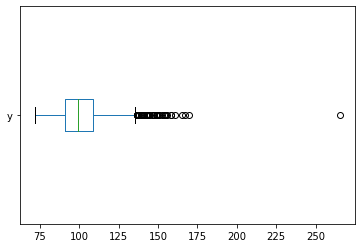

In [58]:
Train_Data['y'].plot(kind='box',vert=False)

In [59]:
Train_Data.y.describe()

count    4209.000000
mean      100.669318
std        12.679381
min        72.110000
25%        90.820000
50%        99.150000
75%       109.010000
max       265.320000
Name: y, dtype: float64

In [60]:
Q1 = 90.82
Q3 = 109.01
IQR = Q3-Q1
Whisker = Q3 + 1.5*IQR
Whisker

136.29500000000002

In [61]:
Train_Data_No_Outlier = Train_Data[Train_Data.y<=Whisker]
Train_Data_No_Outlier.shape

(4159, 365)

In [62]:
#4.Perform dimensionality reduction.

In [63]:
Train_Data_PCA = Train_Data.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','y'],axis=1)
Train_data_NoPCA=Train_Data[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8','y']]

In [64]:
Train_Data_PCA.shape

(4209, 356)

In [65]:
from sklearn.decomposition import PCA

In [66]:
sklearn_pca = PCA(n_components=0.995)
sklearn_pca.fit(Train_Data_PCA)

PCA(n_components=0.995)

In [67]:
sklearn_pca.explained_variance_ratio_

array([0.13075463, 0.08895904, 0.08608808, 0.06848157, 0.05775222,
       0.04803243, 0.03839034, 0.03295792, 0.02810834, 0.02509342,
       0.02354912, 0.01974626, 0.01703296, 0.01658974, 0.0154622 ,
       0.0148002 , 0.0139528 , 0.01220624, 0.01040626, 0.01022129,
       0.00979087, 0.00890637, 0.0088512 , 0.00830484, 0.00803175,
       0.0074351 , 0.00733212, 0.0065182 , 0.00618283, 0.00584653,
       0.00531908, 0.00509227, 0.00471843, 0.00462325, 0.00440977,
       0.00421579, 0.00415108, 0.00404883, 0.00390537, 0.0036097 ,
       0.00355435, 0.00343368, 0.00338189, 0.00323801, 0.00316569,
       0.00299818, 0.00284821, 0.0028165 , 0.00263397, 0.00260255,
       0.00254268, 0.00241672, 0.00238164, 0.00228854, 0.00217744,
       0.00207342, 0.00204986, 0.00195304, 0.00190735, 0.00182114,
       0.00176754, 0.00176037, 0.00167303, 0.00165814, 0.00158727,
       0.00154972, 0.00149492, 0.00149098, 0.00144075, 0.00143579,
       0.00137969, 0.00133213, 0.00132238, 0.00127473, 0.00124

In [68]:
len(sklearn_pca.explained_variance_ratio_)

151

In [69]:
Train_Data_Transformed = sklearn_pca.transform(Train_Data_PCA) 
Train_Data_Transformed.shape

(4209, 151)

In [70]:

Train_Data_Clean = pd.concat([pd.DataFrame(Train_Data_Transformed),Train_data_NoPCA],axis=1) 
Train_Data_Clean.shape

(4209, 160)

In [71]:

Train_Data_Clean_No_Outlier = Train_Data_Clean[Train_Data_Clean.y<=Whisker]
Train_Data_Clean_No_Outlier.shape

(4159, 160)

In [72]:
Test_Data_PCA = Test_Data.drop(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8'],axis=1)
Test_data_NoPCA=Test_Data[['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']]

In [73]:
Test_Data_Transformed = sklearn_pca.transform(Test_Data_PCA)
Test_Data_Transformed.shape

(4209, 151)

In [74]:
Test_Data_Clean = pd.concat([pd.DataFrame(Test_Data_Transformed),Test_data_NoPCA],axis=1) 
Test_Data_Clean.shape

(4209, 159)

In [75]:
print(Train_Data_Clean.shape)
print(Train_Data_Clean_No_Outlier.shape)
print(Test_Data_Clean.shape)

(4209, 160)
(4159, 160)
(4209, 159)


In [76]:
#5.Predict your test_df values using XGBoost.

In [77]:
X=Train_Data.drop('y',axis=1)
y=Train_Data[['y']]

In [78]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,random_state=5)

In [79]:
Features_Clean = Train_Data_Clean.drop('y',axis=1)
Features_No_Outlier = Train_Data_Clean_No_Outlier.drop('y',axis=1)
Target_Clean = Train_Data_Clean[['y']]
Target_No_Outlier = Train_Data_Clean_No_Outlier[['y']]

In [80]:
from sklearn.model_selection import train_test_split

In [81]:
X_Train_Clean,X_Test_Clean,y_Train_Clean, y_Test_Clean = train_test_split(Features_Clean,Target_Clean,random_state = 5)

In [82]:
X_Train_No_Outlier,X_Test_No_Outlier,y_Train_No_Outlier, y_Test_No_Outlier = train_test_split(
    Features_No_Outlier,Target_No_Outlier,random_state = 5)

In [83]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score, KFold

In [84]:
xgbr = xgb.XGBRegressor(verbosity=0) 
print(xgbr)

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             random_state=None, reg_alpha=None, reg_lambda=None,
             scale_pos_weight=None, subsample=None, tree_method=None,
             validate_parameters=None, verbosity=0)


In [85]:
xgbr.fit(X_Train_No_Outlier,y_Train_No_Outlier)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [86]:
score = xgbr.score(X_Train_No_Outlier,y_Train_No_Outlier)
print(score)

0.9451919572354924


In [87]:
CV_score = cross_val_score(xgbr,X_Train_No_Outlier,y_Train_No_Outlier,cv=5)
print('Mean Corss Validation Score: ', CV_score.mean())

Mean Corss Validation Score:  0.5033042458158767


In [88]:
yPred_PCA=xgbr.predict(X_Test_No_Outlier)

In [89]:
MSE_PCA= mean_squared_error(yPred_PCA,y_Test_No_Outlier)
RMSE_PCA = np.sqrt(MSE_PCA)
print('RMSE:', RMSE_PCA)

RMSE: 8.173101827500519


In [90]:
#Case 1: Applying XCBoost on Train  Data with no outlier elimination and no PCA transformation

In [91]:
xgbr.fit(Xtrain,ytrain)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [92]:
score_org=xgbr.score(Xtrain,ytrain)
score_org

0.8814451527248507

In [93]:
CV= cross_val_score(xgbr,Xtrain,ytrain,cv=5)
CV.mean()

0.48898999395863696

In [94]:
yPred_org=xgbr.predict(Xtest)

In [95]:
MSE_org= mean_squared_error(yPred_org,ytest)
RMSE_org = np.sqrt(MSE_org)
print('RMSE:', RMSE_org)

RMSE: 10.195511646924606


In [96]:
#Case 2: Applying XCBoost on Train  Data with outlier elimination and no PCA transformation

In [97]:
Train_Data.shape

(4209, 365)

In [98]:
traindata_NoOutlier=Train_Data[Train_Data.y<=Whisker]
traindata_NoOutlier.shape

(4159, 365)

In [99]:
X_features = traindata_NoOutlier.drop('y',axis=1)
y_target = traindata_NoOutlier[['y']]

In [100]:
XTrain_NO,XTest_NO,yTrain_NO,yTest_NO=train_test_split(X_features,y_target,random_state=5)

In [101]:
xgbr.fit(XTrain_NO,yTrain_NO)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [102]:
score_NO=xgbr.score(XTrain_NO,yTrain_NO)
score_NO

0.9018441431748303

In [103]:
CV_NO= cross_val_score(xgbr,XTrain_NO,yTrain_NO,cv=5)
CV_NO.mean()

0.5640924727074079

In [104]:
yPred_NO=xgbr.predict(XTest_NO)

In [105]:
MSE_NO= mean_squared_error(yPred_NO,yTest_NO)
RMSE_NO = np.sqrt(MSE_NO)
print('RMSE:', RMSE_NO)

RMSE: 7.512999014090298


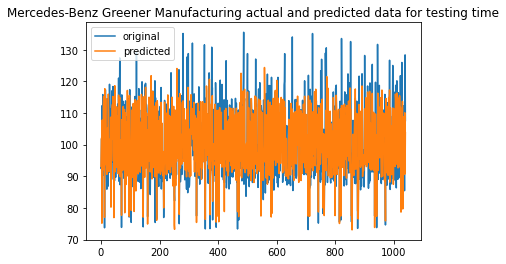

In [106]:
x_ax = range(len(yTest_NO))
plt.plot(x_ax, yTest_NO, label="original")
plt.plot(x_ax, yPred_NO, label="predicted")
plt.title("Mercedes-Benz Greener Manufacturing actual and predicted data for testing time")
plt.legend()
plt.show()